In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PowerTransformer
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Membaca data dari file CSV
df = pd.read_csv('gldm_features_Data_Normal.csv')

# Membagi data menjadi beberapa dataframe berdasarkan arah
directions = ['0', '45', '90', '135']
dataframes = []

for direction in directions:
    cols = [f'Contrast_{direction}', f'ASM_{direction}', f'Entropy_{direction}', f'Mean_{direction}',
            f'IDM_{direction}']
    df_direction = df[['Image'] + cols]
    df_direction['Label'] = df.index.map(lambda x: 0 if x <= 600 else 1)
    dataframes.append(df_direction)

C:\Users\hanif\AppData\Local\Temp\ipykernel_16460\2209788452.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direction['Label'] = df.index.map(lambda x: 0 if x <= 600 else 1)
C:\Users\hanif\AppData\Local\Temp\ipykernel_16460\2209788452.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direction['Label'] = df.index.map(lambda x: 0 if x <= 600 else 1)
C:\Users\hanif\AppData\Local\Temp\ipykernel_16460\2209788452.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

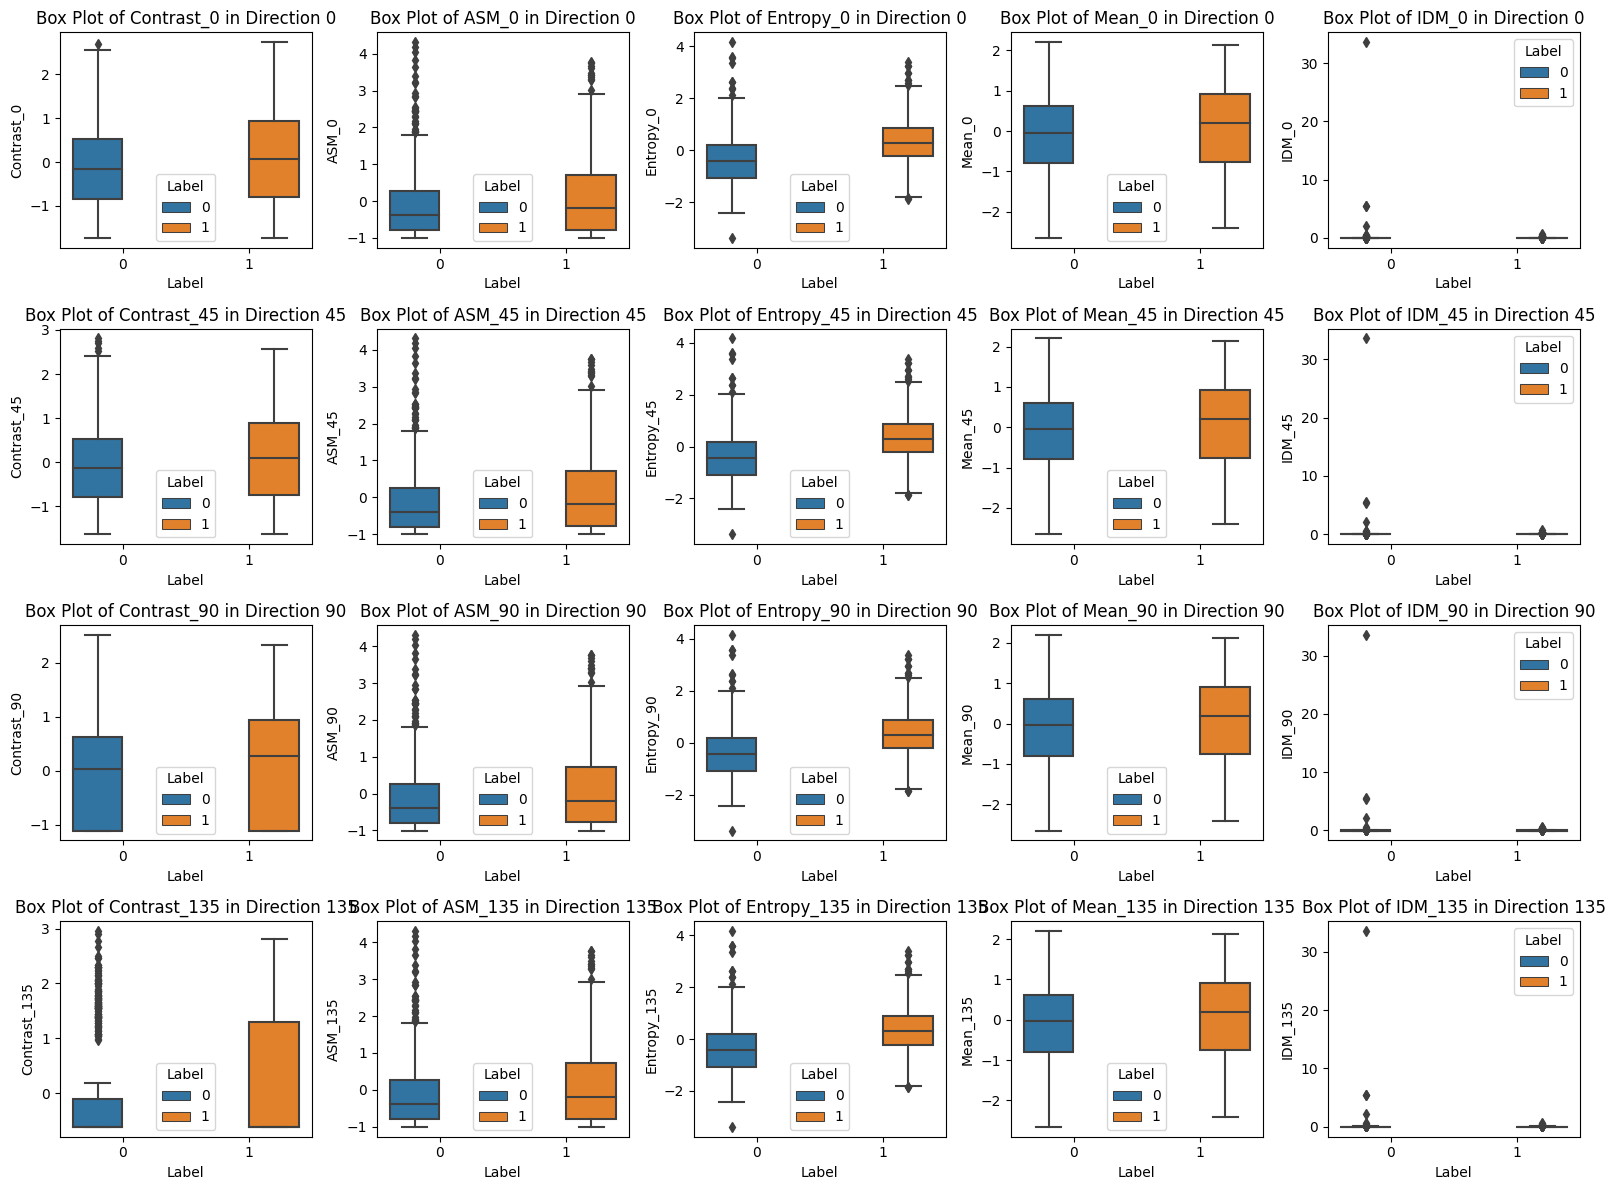

In [3]:
fig, axes = plt.subplots(len(directions), len(dataframes[0].columns) - 2, figsize=(16, 12))

# Visualize each direction
for i, direction in enumerate(directions):
    df_direction = dataframes[i]

    # Box plots for each GLDM parameter
    for j, column in enumerate(df_direction.columns[1:-1]):  # Exclude 'Image' and 'Label' columns
        ax = axes[i, j]
        sns.boxplot(x='Label', y=column, hue='Label', data=df_direction, ax=ax)
        ax.set_title(f'Box Plot of {column} in Direction {direction}')
        ax.legend(title='Label')
        ax.set_xlabel('Label')
        ax.set_ylabel(column)

plt.tight_layout()
plt.show()


In [4]:


# Fungsi untuk melatih dan menguji model SVM dengan Grid Search
def train_test_SVM(df):
    X = df.drop(['Image', 'Label'], axis=1)
    y = df['Label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = PowerTransformer()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Daftar kombinasi hiperparameter yang akan diuji
    param_grid = {'C': [1, 10, 100],
                  'gamma': [0.1, 0.01, 0.001],
                  'kernel': ['rbf', 'linear', 'poly']}
    
    
    svm = SVC()

    # Mencari kombinasi hiperparameter terbaik menggunakan Grid Search (Metode 1)
    grid_search = GridSearchCV(svm, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    
    

    # Menggunakan model terbaik untuk prediksi
    best_svm = grid_search.best_estimator_
    y_pred = best_svm.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# List untuk menyimpan akurasi per direction
accuracies = []



# Melakukan train dan test untuk setiap dataframe dan menampilkan dataframe hasilnya
for i, df_direction in enumerate(dataframes):
    accuracy = train_test_SVM(df_direction)
    accuracies.append(accuracy)
    
    print(f"Akurasi Direction {directions[i]}")
    #print(df_direction)
    
    print(f"Accuracy: {accuracy}")
    print()
    



Akurasi Direction 0
Accuracy: 0.6875

Akurasi Direction 45
Accuracy: 0.6791666666666667

Akurasi Direction 90
Accuracy: 0.6958333333333333

Akurasi Direction 135
Accuracy: 0.6708333333333333



In [5]:
# Membuat dataframe dari akurasi per direction
df_accuracy = pd.DataFrame({'Direction': directions, 'Accuracy': accuracies})
index_column = ["SVM"]
degree_ = [" ","0","45","90","135", "Avarage"]
average_accuracy = df_accuracy['Accuracy'].mean()

data = {
    degree_[0] : index_column,
    degree_[1] : accuracies[0],
    degree_[2] : accuracies[1],
    degree_[3] : accuracies[2],
    degree_[4] : accuracies[3],
    degree_[5] : average_accuracy,
}

In [6]:
df2 = pd.DataFrame(data)
print(df2)

             0        45        90       135   Avarage
0  SVM  0.6875  0.679167  0.695833  0.670833  0.683333


In [7]:

import seaborn as sns
import matplotlib.pyplot as plt
